This code is intended to assess the distribution of my data based on the features for both the RNA and the proteins.

Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/21_PARCLIP_MOV10_Sievers_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/25_CLIPSEQ_SFRS1_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/3_HITSCLIP_Ago2_binding_clusters/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/10_PARCLIP_ELAVL1A_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/6_CLIP-seq-eIF4AIII_1/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/31_ICLIP_U2AF65_Hela_iCLIP_ctrl+kd_all_clusters/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/datasets/clip/28_ICLIP_TIA1_hg19/Combined_RNA_Protein_Matrix.csv
Processing file: /Users/marcobenavides/repos/ML-4-FG/3D-RBP/

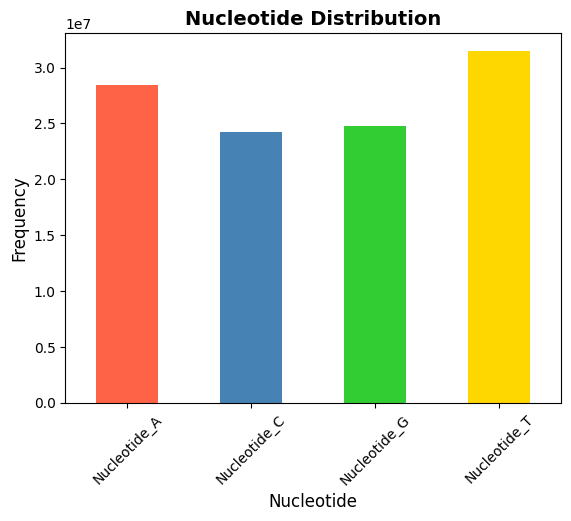

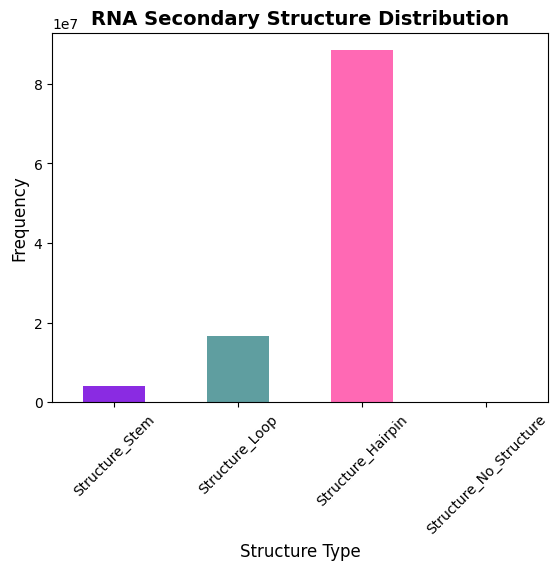

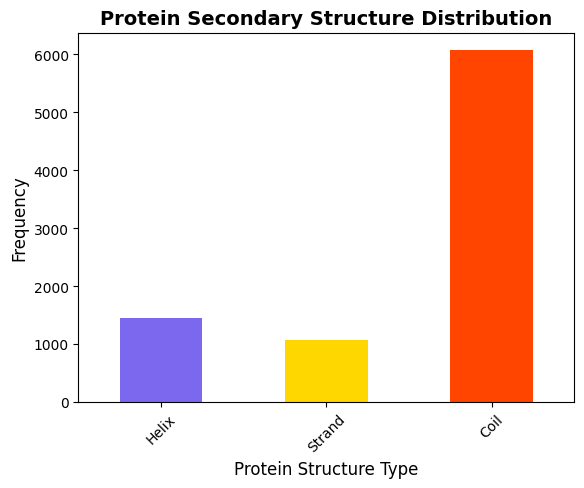

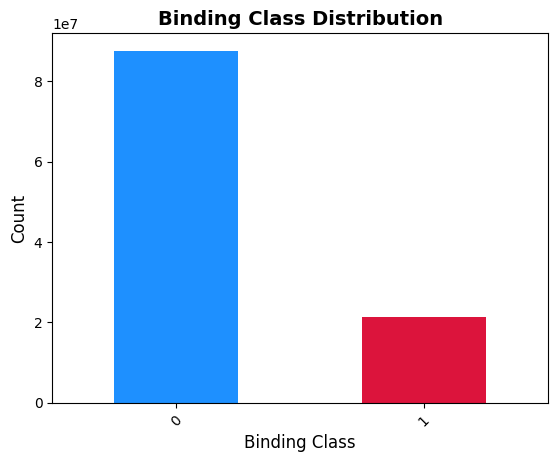

In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the base path relative to the current working directory
base_folder_path = os.path.join(os.getcwd(), "datasets", "clip")
file_pattern = os.path.join(base_folder_path, '**', 'Combined_RNA_Protein_Matrix.csv')

# Find all files matching the pattern
file_paths = glob.glob(file_pattern, recursive=True)

# Initialize counters for distributions
nucleotide_counts = pd.Series(dtype='int', index=['Nucleotide_A', 'Nucleotide_C', 'Nucleotide_G', 'Nucleotide_T']).fillna(0)
structure_counts = pd.Series(dtype='int', index=['Structure_Stem', 'Structure_Loop', 'Structure_Hairpin', 'Structure_No_Structure']).fillna(0)
protein_structure_counts = pd.Series(dtype='int', index=['Helix', 'Strand', 'Coil']).fillna(0)
binding_counts = pd.Series(dtype='int', index=[0, 1]).fillna(0)  # Assuming 0 for non-binding, 1 for binding

# Process each file and update counts without loading all data into memory
for file_path in file_paths:
    try:
        temp_df = pd.read_csv(file_path)
        print(f"Processing file: {file_path}")  # Print to confirm file processing
        
        # Drop unnecessary columns if they exist
        columns_to_drop = ["Sequence_Name", "Position", "X", "Y", "Z"]
        temp_df = temp_df.drop(columns=[col for col in columns_to_drop if col in temp_df.columns], errors='ignore')
        
        # Update nucleotide counts
        if set(['Nucleotide_A', 'Nucleotide_C', 'Nucleotide_G', 'Nucleotide_T']).issubset(temp_df.columns):
            nucleotide_counts += temp_df[['Nucleotide_A', 'Nucleotide_C', 'Nucleotide_G', 'Nucleotide_T']].sum()
        
        # Update RNA secondary structure counts
        if set(['Structure_Stem', 'Structure_Loop', 'Structure_Hairpin', 'Structure_No_Structure']).issubset(temp_df.columns):
            structure_counts += temp_df[['Structure_Stem', 'Structure_Loop', 'Structure_Hairpin', 'Structure_No_Structure']].sum()
        
        # Update protein secondary structure counts
        if set(['Helix', 'Strand', 'Coil']).issubset(temp_df.columns):
            protein_structure_counts += temp_df[['Helix', 'Strand', 'Coil']].sum()
        
        # Update binding class counts
        if 'Binding_Class' in temp_df.columns:
            binding_counts = binding_counts.add(temp_df['Binding_Class'].value_counts(), fill_value=0)
    
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Define colors for each plot
nucleotide_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
structure_colors = ['#8A2BE2', '#5F9EA0', '#FF69B4', '#8B4513']
protein_structure_colors = ['#7B68EE', '#FFD700', '#FF4500']
binding_class_colors = ['#1E90FF', '#DC143C']

# Plotting results

# Nucleotide distribution
nucleotide_counts.plot(kind='bar', color=nucleotide_colors)
plt.title('Nucleotide Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Nucleotide', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# RNA secondary structure distribution
structure_counts.plot(kind='bar', color=structure_colors)
plt.title('RNA Secondary Structure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Structure Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Protein structure distribution
protein_structure_counts.plot(kind='bar', color=protein_structure_colors)
plt.title('Protein Secondary Structure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Protein Structure Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Binding class distribution
binding_counts.plot(kind='bar', color=binding_class_colors)
plt.title('Binding Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Binding Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()
